<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/AI_W12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.5 MB/s eta 0:00:00


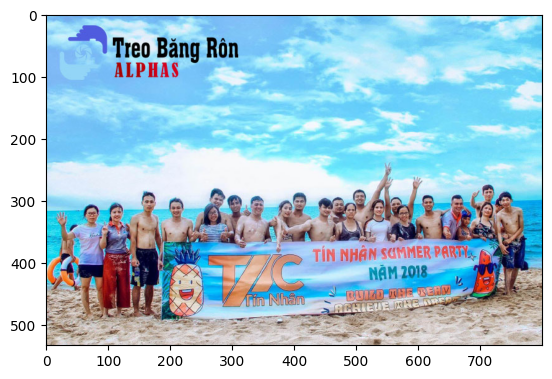

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

filename = '/content/drive/MyDrive/vai-tro-cua-in-bang-ron-quang-cao.jpg'
img = plt.imread(filename)
plt.imshow(img)


In [ ]:
detector = MTCNN()
faces = detector.detect_faces(img)
for face in faces:
  print(face)

3/3 [==============================] - 0s 46ms/step
{'box': [200, 304, 18, 22], 'confidence': 0.9999977946281433, 'keypoints': {'left_eye': (205, 312), 'right_eye': (213, 312), 'nose': (209, 317), 'mouth_left': (205, 320), 'mouth_right': (214, 320)}}
{'box': [400, 295, 16, 19], 'confidence': 0.9999868273735046, 'keypoints': {'left_eye': (405, 302), 'right_eye': (413, 302), 'nose': (408, 306), 'mouth_left': (404, 309), 'mouth_right': (412, 310)}}
{'box': [655, 298, 16, 20], 'confidence': 0.9999868273735046, 'keypoints': {'left_eye': (662, 305), 'right_eye': (670, 306), 'nose': (667, 310), 'mouth_left': (661, 313), 'mouth_right': (669, 313)}}
{'box': [529, 304, 14, 19], 'confidence': 0.9999561905860901, 'keypoints': {'left_eye': (533, 311), 'right_eye': (540, 311), 'nose': (537, 315), 'mouth_left': (533, 319), 'mouth_right': (540, 319)}}
{'box': [608, 297, 15, 18], 'confidence': 0.9999428391456604, 'keypoints': {'left_eye': (613, 304), 'right_eye': (620, 303), 'nose': (617, 307), 'mouth_

3/3 [==============================] - 0s 33ms/step


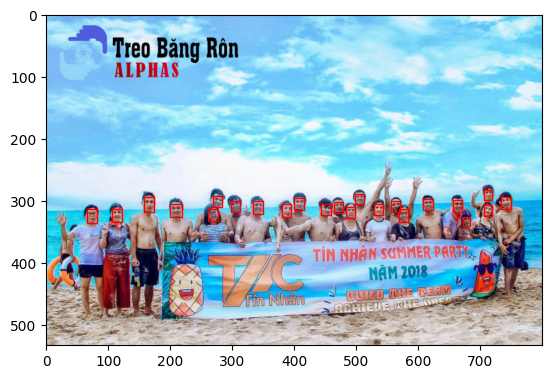

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

filename='/content/drive/MyDrive/vai-tro-cua-in-bang-ron-quang-cao.jpg'
detector = MTCNN()
faces = detector.detect_faces(img)
plt.imshow(img)
ax = plt.gca()
for face in faces:
    x,y,width,height = face['box']
    rect = plt.Rectangle((x,y),width,height,fill = False,color='red')
    ax.add_patch(rect)
    plt.savefig('/content/drive/MyDrive/test1.jpg')
plt.show()

3/3 [==============================] - 0s 35ms/step


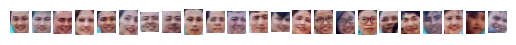

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def draw_faces(filename,result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height = result_list[i]['box']
    x2,y2 = x1+width,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
  plt.show()

filename = '/content/drive/MyDrive/vai-tro-cua-in-bang-ron-quang-cao.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
draw_faces(filename,faces)

In [ ]:
import tensorflow as tf

def ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    # **kwargs,
):

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/113.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])


35363/35363 [==============================] - 0s 0us/step
Predicted: [('n01882714', 'koala', 0.97152495), ('n02500267', 'indri', 0.020920217), ('n02497673', 'Madagascar_cat', 0.003292796)]


1/1 [==============================] - 1s 720ms/step
koala: 99.94%
indri: 0.03%
Madagascar_cat: 0.02%
titi: 0.00%
fox_squirrel: 0.00%


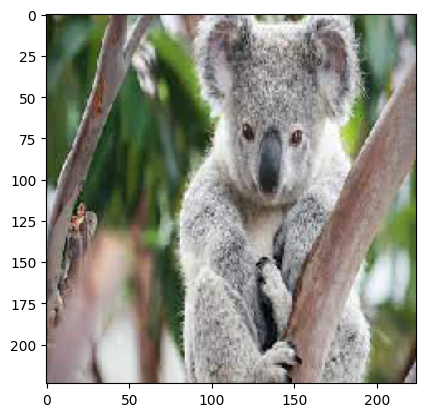

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=True)

img_path = '/content/drive/MyDrive/113.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Print the top 5 predicted classes
for pred in decoded_predictions:
    print(f"{pred[1]}: {pred[2]*100:.2f}%")

plt.imshow(img)

In [ ]:
5 file giọng nói(5 ngôn ngữ)
5 file bài hát
text

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19,decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet', include_top=True)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/drive/MyDrive/113.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Print the top 5 predicted classes
for pred in decoded_predictions:
    print(f"{pred[1]}: {pred[2]*100:.2f}%")

plt.imshow(img)

1/1 [==============================] - 1s 1s/step


ValueError: ignored

In [ ]:
pip install youtube_search 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from youtube_search import YoutubeSearch
import webbrowser 

mysong = input('nhap ten bai hat: ')
result = YoutubeSearch(mysong,max_results=10).to_dict()
print(result)
print(result[0]['url_suffix'])
url = 'http://www.youtube.com' + result[0]['url_suffix']
print(url)
webbrowser.open(url)
print('bai hat yeu thich cua ban da duoc mo')


nhap ten bai hat: none
[{'id': 'O7zviFGFwEU', 'thumbnails': ['https://i.ytimg.com/vi/O7zviFGFwEU/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLAo8RjmAeDqF83ErCEExcvbZStzMQ', 'https://i.ytimg.com/vi/O7zviFGFwEU/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLAVbl5W7Q_qpOD8XLnA7zUCdn7XNw'], 'title': 'NONE - Rest [From the album: Inevitable]', 'long_desc': None, 'channel': 'Hypnotic Dirge Records', 'duration': '10:28', 'views': '3,774 views', 'publish_time': '9 days ago', 'url_suffix': '/watch?v=O7zviFGFwEU&pp=ygUEbm9uZQ%3D%3D'}, {'id': 'rywUS-ohqeE', 'thumbnails': ['https://i.ytimg.com/vi/rywUS-ohqeE/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDZcrJu7MeelcLhTk9Q0SXWhrnr7A', 'https://i.ytimg.com/vi/rywUS-ohqeE/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLCi7rkDXhggOTQQsyr73IsmwQukjw'], 'title': 'Alicia Keys - No One (Official Music Video)', 'long_desc': None, 'channel': 'Alicia Keys', 

In [ ]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from youtube_search import YoutubeSearch 
import webbrowser
from openpyxl import Workbook 
data=Workbook ()
sheet=data.active
mysong=input('Xin moi ban chon tên bài hát: ')
print(mysong)
result = YoutubeSearch(mysong, max_results=10).to_dict()
print(result)
for i in range(10):
  print(result[i]['title'])
  print(result[i]['url_suffix'])
  url = 'https://www.youtube.com'+ result [i] ['url_suffix']
  print(url)
  sheet['A'+str(i+1)]=i+1
  sheet['B'+str(i+1)]=result[i]['title']
  sheet['C'+str(i+1)]=result[i]['url_suffix']
  sheet['D'+str(i+1)]=result[i]['views']
  sheet['E'+str(i+1)]=result[i]['channel']
  sheet['F'+str(i+1)]=result[i]['duration']

data. save ('UEH.xls')

Xin moi ban chon tên bài hát: noi nay co anh
noi nay co anh
[{'id': 'FN7ALfpGxiI', 'thumbnails': ['https://i.ytimg.com/vi/FN7ALfpGxiI/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDRNomNAztlKwv4at1AT2HIC8fvsw', 'https://i.ytimg.com/vi/FN7ALfpGxiI/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLDdibmdEB8ldKX3xOGuB7RCg7oyCg'], 'title': 'NƠI NÀY CÓ ANH | OFFICIAL MUSIC VIDEO | SƠN TÙNG M-TP', 'long_desc': None, 'channel': 'Sơn Tùng M-TP Official', 'duration': '4:39', 'views': '324,783,757 views', 'publish_time': '6 years ago', 'url_suffix': '/watch?v=FN7ALfpGxiI&pp=ygUObm9pIG5heSBjbyBhbmg%3D'}, {'id': 'x2TA9IJyT4I', 'thumbnails': ['https://i.ytimg.com/vi/x2TA9IJyT4I/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLCaW3y_xkYVooWUlrDCa025dXKpxg', 'https://i.ytimg.com/vi/x2TA9IJyT4I/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLDh37pbSpE4LYS8A8lIdIISOeb_gw'], 'title': 'Nơi Này Có Anh (ST: Sơn T